# PCA Analysis

In [1]:
# PCA Analysis Residential Sales Data

# Install packages
#install.packages("dplyr")
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
setwd("D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report")  #set my working directory
getwd()

HOME_A.df <- read.csv("ResidentialSalesWithLocation_CSV.csv", header = TRUE)  #import data into R

str(HOME_A.df)   #To check the data structure of the loaded dataset

[1] "D:/Penn State/DAAN/DAAN 888 Analytics Design Implementation/Report"

'data.frame':	108403 obs. of  44 variables:
 $ SSL              : chr  "0150    0275" "0150    0276" "0150    0277" "0150    0278" ...
 $ BATHRM           : int  1 1 1 2 1 1 2 1 1 1 ...
 $ HF_BATHRM        : int  1 0 0 1 1 1 1 1 1 1 ...
 $ HEAT             : int  7 7 13 7 7 7 7 7 7 7 ...
 $ HEAT_D           : chr  "Warm Cool" "Warm Cool" "Hot Water Rad" "Warm Cool" ...
 $ AC               : chr  "Y" "Y" "N" "Y" ...
 $ NUM_UNITS        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS            : int  6 6 6 6 6 6 6 6 6 6 ...
 $ BEDRM            : int  3 3 3 2 3 3 2 3 3 3 ...
 $ AYB              : int  1900 1900 1900 1900 1900 1910 1900 1900 1900 1900 ...
 $ YR_RMDL          : int  2004 NA NA 2016 NA NA 2001 NA 2003 2015 ...
 $ EYB              : int  1971 1961 1961 1971 1961 1968 1971 1971 1971 1961 ...
 $ STORIES          : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE         : chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE     

In [3]:
# Remove attributes with no predictive value
HOME.df <- HOME_A.df[ -c(1, 5, 11, 16, 21, 23, 25, 27, 29, 31, 33, 36, 38, 39, 42, 43) ]

str(HOME.df)   #To check the data structure of the loaded dataset

'data.frame':	108403 obs. of  28 variables:
 $ BATHRM         : int  1 1 1 2 1 1 2 1 1 1 ...
 $ HF_BATHRM      : int  1 0 0 1 1 1 1 1 1 1 ...
 $ HEAT           : int  7 7 13 7 7 7 7 7 7 7 ...
 $ AC             : chr  "Y" "Y" "N" "Y" ...
 $ NUM_UNITS      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS          : int  6 6 6 6 6 6 6 6 6 6 ...
 $ BEDRM          : int  3 3 3 2 3 3 2 3 3 3 ...
 $ AYB            : int  1900 1900 1900 1900 1900 1910 1900 1900 1900 1900 ...
 $ EYB            : int  1971 1961 1961 1971 1961 1968 1971 1971 1971 1961 ...
 $ STORIES        : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE       : chr  "2013/07/22 00:00:00+00" "1900/01/01 00:00:00+00" "1996/02/12 00:00:00+00" "2022/04/06 00:00:00+00" ...
 $ PRICE          : int  755000 NA 118000 1110000 0 251000 930388 606500 0 162000 ...
 $ SALE_NUM       : int  1 1 1 5 3 1 5 1 3 1 ...
 $ GBA            : int  1286 1286 1286 1304 1286 1286 1286 1286 1344 1286 ...
 $ BLDG_NUM       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ STYLE         

In [4]:
################################################################################
# Clean up Date attribute

# Because "SALEDATE" is class 'character', we must convert it to class 'Date'
# Tell R how to identify the date parts of the "SALEDATE" field
# The format = argument specifies the date components and 
# drops the time component in the "SALEDATE'
HOME.df$SALEDATE <- as.Date(HOME.df$SALEDATE, format = "%Y/%m/%d")

str(HOME.df)   # Verify the time component was dropped

# convert 'SALEDATE' to a factor variable 
HOME.df$SALEDATE <- as.factor(HOME.df$SALEDATE)

str(HOME.df)   # Verify 'SALEDATE' is a factor
################################################################################

'data.frame':	108403 obs. of  28 variables:
 $ BATHRM         : int  1 1 1 2 1 1 2 1 1 1 ...
 $ HF_BATHRM      : int  1 0 0 1 1 1 1 1 1 1 ...
 $ HEAT           : int  7 7 13 7 7 7 7 7 7 7 ...
 $ AC             : chr  "Y" "Y" "N" "Y" ...
 $ NUM_UNITS      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS          : int  6 6 6 6 6 6 6 6 6 6 ...
 $ BEDRM          : int  3 3 3 2 3 3 2 3 3 3 ...
 $ AYB            : int  1900 1900 1900 1900 1900 1910 1900 1900 1900 1900 ...
 $ EYB            : int  1971 1961 1961 1971 1961 1968 1971 1971 1971 1961 ...
 $ STORIES        : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE       : Date, format: "2013-07-22" "1900-01-01" ...
 $ PRICE          : int  755000 NA 118000 1110000 0 251000 930388 606500 0 162000 ...
 $ SALE_NUM       : int  1 1 1 5 3 1 5 1 3 1 ...
 $ GBA            : int  1286 1286 1286 1304 1286 1286 1286 1286 1344 1286 ...
 $ BLDG_NUM       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ STYLE          : int  4 4 4 4 4 4 4 4 4 4 ...
 $ STRUCT         : int  7 7 7 7 

In [5]:
################################################################################
# Remove 0s from the "PRICE" variable

HOME.df <- filter(HOME.df, PRICE > 0)

str(HOME.df)

summary(HOME.df$PRICE)     #To check the variables and counts
################################################################################

'data.frame':	62008 obs. of  28 variables:
 $ BATHRM         : int  1 1 2 1 2 1 1 2 2 1 ...
 $ HF_BATHRM      : int  1 0 1 1 1 1 1 1 0 1 ...
 $ HEAT           : int  7 13 7 7 7 7 7 7 7 8 ...
 $ AC             : chr  "Y" "N" "Y" "Y" ...
 $ NUM_UNITS      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS          : int  6 6 6 6 6 6 6 6 5 6 ...
 $ BEDRM          : int  3 3 2 3 2 3 3 3 2 3 ...
 $ AYB            : int  1900 1900 1900 1910 1900 1900 1900 1900 1900 1900 ...
 $ EYB            : int  1971 1961 1971 1968 1971 1971 1961 1971 1971 1968 ...
 $ STORIES        : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE       : Factor w/ 7729 levels "1900-01-01","1947-05-14",..: 5475 1136 7634 2207 7543 3614 728 4424 3642 405 ...
 $ PRICE          : int  755000 118000 1110000 251000 930388 606500 162000 534000 450000 144330 ...
 $ SALE_NUM       : int  1 1 5 1 5 1 1 1 1 1 ...
 $ GBA            : int  1286 1286 1304 1286 1286 1286 1286 1286 1304 1286 ...
 $ BLDG_NUM       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ STYLE 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1   300000   557985   706961   894000 25100000 

In [6]:
################################################################################
# Convert remaining 'character' variables to 'factor'

HOME.df$AC <- as.factor(HOME.df$AC)
HOME.df$ASSESSMENT_NBHD <- as.factor(HOME.df$ASSESSMENT_NBHD)
HOME.df$WARD <- as.factor(HOME.df$WARD)

str(HOME.df)   # Verify 'character' variables converted to 'factor'
################################################################################

'data.frame':	62008 obs. of  28 variables:
 $ BATHRM         : int  1 1 2 1 2 1 1 2 2 1 ...
 $ HF_BATHRM      : int  1 0 1 1 1 1 1 1 0 1 ...
 $ HEAT           : int  7 13 7 7 7 7 7 7 7 8 ...
 $ AC             : Factor w/ 2 levels "N","Y": 2 1 2 2 2 2 2 2 2 1 ...
 $ NUM_UNITS      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS          : int  6 6 6 6 6 6 6 6 5 6 ...
 $ BEDRM          : int  3 3 2 3 2 3 3 3 2 3 ...
 $ AYB            : int  1900 1900 1900 1910 1900 1900 1900 1900 1900 1900 ...
 $ EYB            : int  1971 1961 1971 1968 1971 1971 1961 1971 1971 1968 ...
 $ STORIES        : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE       : Factor w/ 7729 levels "1900-01-01","1947-05-14",..: 5475 1136 7634 2207 7543 3614 728 4424 3642 405 ...
 $ PRICE          : int  755000 118000 1110000 251000 930388 606500 162000 534000 450000 144330 ...
 $ SALE_NUM       : int  1 1 5 1 5 1 1 1 1 1 ...
 $ GBA            : int  1286 1286 1304 1286 1286 1286 1286 1286 1304 1286 ...
 $ BLDG_NUM       : int  1 1 1 

In [7]:
######################### Convert Factors to Numeric ##########################

HOME.df$AC <- as.numeric(HOME.df$AC)
HOME.df$SALEDATE <- as.numeric(HOME.df$SALEDATE)
HOME.df$ASSESSMENT_NBHD <- as.numeric(HOME.df$ASSESSMENT_NBHD)
HOME.df$WARD <- as.numeric(HOME.df$WARD)

str(HOME.df)   # Check the data structure
################################################################################

'data.frame':	62008 obs. of  28 variables:
 $ BATHRM         : int  1 1 2 1 2 1 1 2 2 1 ...
 $ HF_BATHRM      : int  1 0 1 1 1 1 1 1 0 1 ...
 $ HEAT           : int  7 13 7 7 7 7 7 7 7 8 ...
 $ AC             : num  2 1 2 2 2 2 2 2 2 1 ...
 $ NUM_UNITS      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS          : int  6 6 6 6 6 6 6 6 5 6 ...
 $ BEDRM          : int  3 3 2 3 2 3 3 3 2 3 ...
 $ AYB            : int  1900 1900 1900 1910 1900 1900 1900 1900 1900 1900 ...
 $ EYB            : int  1971 1961 1971 1968 1971 1971 1961 1971 1971 1968 ...
 $ STORIES        : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE       : num  5475 1136 7634 2207 7543 ...
 $ PRICE          : int  755000 118000 1110000 251000 930388 606500 162000 534000 450000 144330 ...
 $ SALE_NUM       : int  1 1 5 1 5 1 1 1 1 1 ...
 $ GBA            : int  1286 1286 1304 1286 1286 1286 1286 1286 1304 1286 ...
 $ BLDG_NUM       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ STYLE          : int  4 4 4 4 4 4 4 4 4 4 ...
 $ STRUCT         : int  7

In [8]:
######################### Convert remaining NA's to 0 ##########################

HOME.df[is.na(HOME.df)] <- 0

str(HOME.df)   # Check the data structure
summary(HOME.df)   # Check for NA's
################################################################################

'data.frame':	62008 obs. of  28 variables:
 $ BATHRM         : num  1 1 2 1 2 1 1 2 2 1 ...
 $ HF_BATHRM      : num  1 0 1 1 1 1 1 1 0 1 ...
 $ HEAT           : num  7 13 7 7 7 7 7 7 7 8 ...
 $ AC             : num  2 1 2 2 2 2 2 2 2 1 ...
 $ NUM_UNITS      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ ROOMS          : num  6 6 6 6 6 6 6 6 5 6 ...
 $ BEDRM          : num  3 3 2 3 2 3 3 3 2 3 ...
 $ AYB            : num  1900 1900 1900 1910 1900 1900 1900 1900 1900 1900 ...
 $ EYB            : int  1971 1961 1971 1968 1971 1971 1961 1971 1971 1968 ...
 $ STORIES        : num  2 2 2 2 2 2 2 2 2 2 ...
 $ SALEDATE       : num  5475 1136 7634 2207 7543 ...
 $ PRICE          : int  755000 118000 1110000 251000 930388 606500 162000 534000 450000 144330 ...
 $ SALE_NUM       : int  1 1 5 1 5 1 1 1 1 1 ...
 $ GBA            : int  1286 1286 1304 1286 1286 1286 1286 1286 1304 1286 ...
 $ BLDG_NUM       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ STYLE          : num  4 4 4 4 4 4 4 4 4 4 ...
 $ STRUCT         : num  7

     BATHRM         HF_BATHRM           HEAT              AC       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   :1.000  
 1st Qu.: 1.000   1st Qu.: 0.000   1st Qu.: 1.000   1st Qu.:2.000  
 Median : 2.000   Median : 1.000   Median : 7.000   Median :2.000  
 Mean   : 2.265   Mean   : 0.662   Mean   : 6.369   Mean   :1.755  
 3rd Qu.: 3.000   3rd Qu.: 1.000   3rd Qu.:13.000   3rd Qu.:2.000  
 Max.   :24.000   Max.   :12.000   Max.   :13.000   Max.   :2.000  
   NUM_UNITS          ROOMS             BEDRM             AYB      
 Min.   : 0.000   Min.   :  0.000   Min.   : 0.000   Min.   :   0  
 1st Qu.: 1.000   1st Qu.:  6.000   1st Qu.: 3.000   1st Qu.:1914  
 Median : 1.000   Median :  7.000   Median : 3.000   Median :1930  
 Mean   : 1.196   Mean   :  7.355   Mean   : 3.432   Mean   :1933  
 3rd Qu.: 1.000   3rd Qu.:  8.000   3rd Qu.: 4.000   3rd Qu.:1948  
 Max.   :12.000   Max.   :101.000   Max.   :24.000   Max.   :2023  
      EYB          STORIES           SALEDATE   

In [9]:
######################### Scale the Data #######################################
# Scale the data frame

# Move the dependent variable to the last column of the data frame
HOME.df <- select(HOME.df,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,12)

HOME.df.sc <- HOME.df
HOME.df.sc[, 1:27] <- scale(HOME.df[, 1:27])
str(HOME.df.sc)
summary(HOME.df.sc)   # To check the variables and counts
################################################################################

'data.frame':	62008 obs. of  28 variables:
 $ BATHRM         : num  -1.137 -1.137 -0.238 -1.137 -0.238 ...
 $ HF_BATHRM      : num  0.557 -1.092 0.557 0.557 0.557 ...
 $ HEAT           : num  0.122 1.282 0.122 0.122 0.122 ...
 $ AC             : num  0.569 -1.757 0.569 0.569 0.569 ...
 $ NUM_UNITS      : num  -0.315 -0.315 -0.315 -0.315 -0.315 ...
 $ ROOMS          : num  -0.531 -0.531 -0.531 -0.531 -0.531 ...
 $ BEDRM          : num  -0.36 -0.36 -1.19 -0.36 -1.19 ...
 $ AYB            : num  -0.381 -0.381 -0.381 -0.266 -0.381 ...
 $ EYB            : num  0.1012 0.0571 0.1012 0.0879 0.1012 ...
 $ STORIES        : num  -0.0598 -0.0598 -0.0598 -0.0598 -0.0598 ...
 $ SALEDATE       : num  0.087 -2.081 1.166 -1.546 1.12 ...
 $ SALE_NUM       : num  -0.839 -0.839 1.454 -0.839 1.454 ...
 $ GBA            : num  -0.498 -0.498 -0.477 -0.498 -0.498 ...
 $ BLDG_NUM       : num  -0.0169 -0.0169 -0.0169 -0.0169 -0.0169 ...
 $ STYLE          : num  -0.208 -0.208 -0.208 -0.208 -0.208 ...
 $ STRUCT  

     BATHRM          HF_BATHRM            HEAT              AC         
 Min.   :-2.0365   Min.   :-1.0916   Min.   :-1.232   Min.   :-1.7565  
 1st Qu.:-1.1374   1st Qu.:-1.0916   1st Qu.:-1.038   1st Qu.: 0.5693  
 Median :-0.2382   Median : 0.5574   Median : 0.122   Median : 0.5693  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000   Mean   : 0.0000  
 3rd Qu.: 0.6610   3rd Qu.: 0.5574   3rd Qu.: 1.282   3rd Qu.: 0.5693  
 Max.   :19.5437   Max.   :18.6965   Max.   : 1.282   Max.   : 0.5693  
   NUM_UNITS           ROOMS             BEDRM              AYB          
 Min.   :-1.9220   Min.   :-2.8843   Min.   :-2.8563   Min.   :-22.2282  
 1st Qu.:-0.3147   1st Qu.:-0.5313   1st Qu.:-0.3598   1st Qu.: -0.2205  
 Median :-0.3147   Median :-0.1391   Median :-0.3598   Median : -0.0365  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   :  0.0000  
 3rd Qu.:-0.3147   3rd Qu.: 0.2530   3rd Qu.: 0.4724   3rd Qu.:  0.1705  
 Max.   :17.3652   Max.   :36.7243   Max.   :17.1160

corrplot 0.92 loaded



,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,⋯,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,ASSESSMENT_NBHD,WARD,YR_RMDL_CAT_2
BATHRM,1.000000000,0.154881984,-0.067152963,0.284401144,0.385513603,0.631391945,0.67543432,0.009952417,0.26242812,0.1467156110,⋯,0.410833292,0.105805268,0.1583021363,0.146610723,0.415616197,0.367332903,0.335552927,-0.072708462,-0.16218700,0.211168953
HF_BATHRM,0.154881984,1.000000000,-0.104575351,0.283997227,-0.135856464,0.143802700,0.18144395,0.038411359,0.15102341,0.0989405238,⋯,0.289486215,0.082646007,0.1110325056,0.095936962,-0.111460177,0.251886368,0.165781243,-0.026928581,-0.08765305,0.069493506
HEAT,-0.067152963,-0.104575351,1.000000000,-0.434540004,0.120012637,0.104322651,0.07177811,-0.102751967,0.12238728,0.0278883484,⋯,-0.222001970,0.017362302,0.1547246176,-0.070443953,0.114192621,0.074250406,0.035478366,-0.102371012,-0.13119699,-0.107826671
AC,0.284401144,0.283997227,-0.434540004,1.000000000,-0.092461608,0.085816835,0.14629808,0.041652170,0.23345583,0.0736559036,⋯,0.477371367,0.094466075,0.0353070558,0.141903927,-0.065487709,0.181096937,0.088864617,-0.044835826,0.02371473,0.310991842
NUM_UNITS,0.385513603,-0.135856464,0.120012637,-0.092461608,1.000000000,0.522548509,0.37520403,-0.058732374,0.21396053,0.0812686291,⋯,0.017676774,0.125019094,0.0129745916,0.072759081,0.893038823,-0.016211117,-0.031649545,-0.009815379,0.05914228,0.076890789
ROOMS,0.631391945,0.143802700,0.104322651,0.085816835,0.522548509,1.000000000,0.67817927,-0.023727106,0.34335624,0.1458122623,⋯,0.256347193,0.135667613,0.1655169925,0.125669538,0.515756489,0.273716894,0.306070437,-0.083295512,-0.04843462,0.091001814
BEDRM,0.675434322,0.181443947,0.071778112,0.146298083,0.375204033,0.678179273,1.00000000,-0.039462337,0.34331761,0.1483306057,⋯,0.292326137,0.106963027,0.1635312845,0.140416802,0.397412947,0.296060688,0.325224728,-0.107702387,-0.11658574,0.152061183
AYB,0.009952417,0.038411359,-0.102751967,0.041652170,-0.058732374,-0.023727106,-0.03946234,1.000000000,-0.10008098,-0.0186326793,⋯,0.023126105,-0.008880063,-0.0885427338,0.027025952,-0.062466882,-0.047927449,0.004214715,0.006125708,0.06660567,-0.222092717
EYB,0.262428120,0.151023413,0.122387282,0.233455828,0.213960533,0.343356238,0.34331761,-0.100080977,1.00000000,0.2041081168,⋯,0.531207825,0.358366890,0.1302290944,0.350066771,0.208704150,0.093491516,0.119858756,-0.174310318,0.25370930,0.133233466
STORIES,0.146715611,0.098940524,0.027888348,0.073655904,0.081268629,0.145812262,0.14833061,-0.018632679,0.20410812,1.0000000000,⋯,0.156452887,0.094732423,0.0788337506,0.082989618,0.086129588,0.105116954,-0.010260913,-0.034259117,-0.02038683,0.047480009


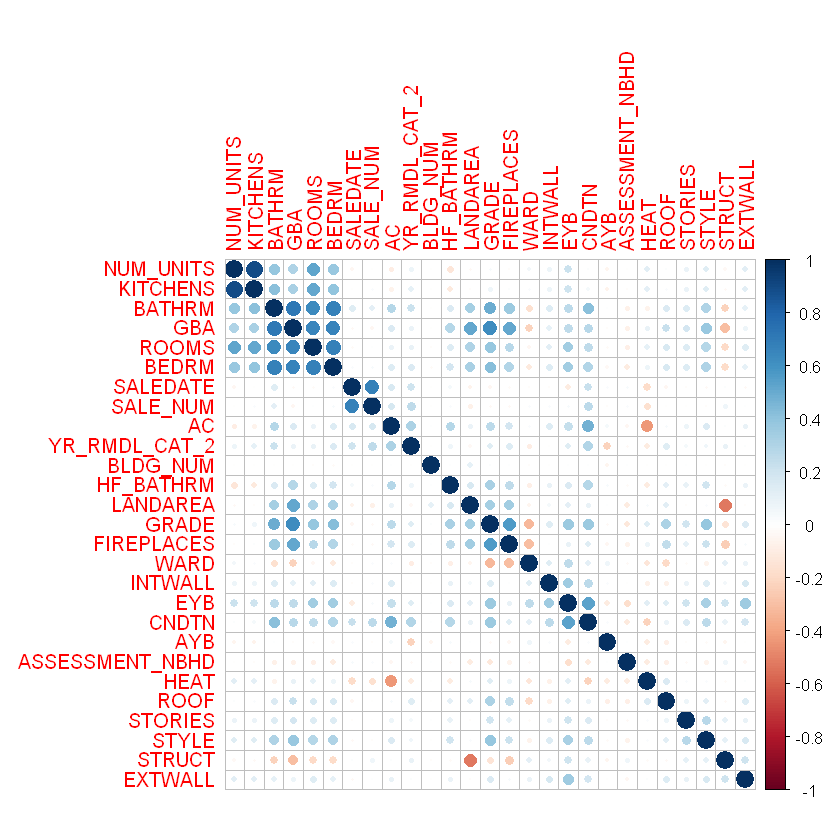

In [10]:
# Now let us look at the correlation matrix
######################################## Correlation Matrix ########################################
#install.packages('corrplot')

library(corrplot)

# hclust â reorder rows and columns according to the variables  similarity in a hierarchical cluster solution

corrplot(cor(HOME.df.sc[, 1:27]), order="hclust") 

# or we can just use the cor() function
cor(HOME.df.sc[, 1:27])
####################################################################################################

In [11]:
# Remove additional attributes with no predictive value based on the correlation matrix results
HOME.df.sc <- HOME.df.sc[ -c(5, 11, 16, 22, 24) ]

str(HOME.df.sc)   #To check the data structure of the loaded dataset

'data.frame':	62008 obs. of  23 variables:
 $ BATHRM         : num  -1.137 -1.137 -0.238 -1.137 -0.238 ...
 $ HF_BATHRM      : num  0.557 -1.092 0.557 0.557 0.557 ...
 $ HEAT           : num  0.122 1.282 0.122 0.122 0.122 ...
 $ AC             : num  0.569 -1.757 0.569 0.569 0.569 ...
 $ ROOMS          : num  -0.531 -0.531 -0.531 -0.531 -0.531 ...
 $ BEDRM          : num  -0.36 -0.36 -1.19 -0.36 -1.19 ...
 $ AYB            : num  -0.381 -0.381 -0.381 -0.266 -0.381 ...
 $ EYB            : num  0.1012 0.0571 0.1012 0.0879 0.1012 ...
 $ STORIES        : num  -0.0598 -0.0598 -0.0598 -0.0598 -0.0598 ...
 $ SALE_NUM       : num  -0.839 -0.839 1.454 -0.839 1.454 ...
 $ GBA            : num  -0.498 -0.498 -0.477 -0.498 -0.498 ...
 $ BLDG_NUM       : num  -0.0169 -0.0169 -0.0169 -0.0169 -0.0169 ...
 $ STYLE          : num  -0.208 -0.208 -0.208 -0.208 -0.208 ...
 $ GRADE          : num  -0.171 -0.171 -0.171 -0.171 -0.171 ...
 $ CNDTN          : num  0.261 -0.873 0.261 0.261 -0.873 ...
 $ EXTWALL

In [12]:
######################################### PCA ######################################################
# Now let us perform the PCA

HOME.df.sc.pc <- prcomp(HOME.df.sc[, 1:22], scale = TRUE)

summary(HOME.df.sc.pc)

HOME.df.sc.pc

HOME.df.sc.pc$rotation[, 1:22]

# Obtain the Eigenvalues
eig <- (HOME.df.sc.pc$sdev)^2

eig

###############################################################################################

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2286 1.4736 1.29621 1.16741 1.12435 1.01697 1.00141
Proportion of Variance 0.2258 0.0987 0.07637 0.06195 0.05746 0.04701 0.04558
Cumulative Proportion  0.2258 0.3245 0.40084 0.46279 0.52025 0.56726 0.61284
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.97623 0.95215 0.91262 0.87891 0.84380 0.82202 0.8097
Proportion of Variance 0.04332 0.04121 0.03786 0.03511 0.03236 0.03071 0.0298
Cumulative Proportion  0.65616 0.69737 0.73523 0.77034 0.80271 0.83342 0.8632
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     0.78534 0.74431 0.64711 0.58939 0.56298 0.55970 0.4851
Proportion of Variance 0.02803 0.02518 0.01903 0.01579 0.01441 0.01424 0.0107
Cumulative Proportion  0.89126 0.91644 0.93547 0.95126 0.96567 0.97991 0.9906
                          PC22
Standard de

Standard deviations (1, .., p=22):
 [1] 2.2286408 1.4736011 1.2962062 1.1674147 1.1243550 1.0169744 1.0014128
 [8] 0.9762269 0.9521461 0.9126191 0.8789104 0.8438022 0.8220160 0.8097431
[15] 0.7853358 0.7443064 0.6471100 0.5893872 0.5629850 0.5597041 0.4851099
[22] 0.4545700

Rotation (n x k) = (22 x 22):
                         PC1          PC2         PC3          PC4          PC5
BATHRM           0.351895529 -0.039666788  0.08344469 -0.247952102  0.235180605
HF_BATHRM        0.181580271  0.083954492  0.15290696 -0.002266016 -0.436248906
HEAT             0.007782644 -0.393383388 -0.33106041  0.265098372  0.095972075
AC               0.183231575  0.379371004  0.30031211 -0.001747106 -0.163095087
ROOMS            0.315066853 -0.123162960 -0.14019876 -0.239842939  0.296365027
BEDRM            0.333361405 -0.105152515 -0.06778754 -0.218198716  0.289350001
AYB             -0.026859971  0.062036820 -0.02633755 -0.482247798 -0.333178684
EYB              0.248989051  0.237786555 -0.39104254 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
BATHRM,0.351895529,-0.039666788,0.08344469,-0.247952102,0.235180605,-0.0003290236,-0.012467298,-0.014537513,0.070060633,0.04291537,⋯,0.039395108,-0.008946895,0.004910742,-0.083420556,0.106878290,-0.455423958,-0.060647677,0.133515212,-0.5255439330,-0.4461048781
HF_BATHRM,0.181580271,0.083954492,0.15290696,-0.002266016,-0.436248906,0.0265240366,-0.073772571,-0.076882945,-0.153480275,0.01612187,⋯,0.313638573,-0.095942526,-0.215751854,0.151111845,0.013746895,-0.027722070,0.003056419,0.012624283,-0.1205262513,-0.1184376218
HEAT,0.007782644,-0.393383388,-0.33106041,0.265098372,0.095972075,0.0724450524,0.008877891,-0.010396564,0.002483956,-0.36359423,⋯,-0.154535308,0.247802762,-0.232613292,-0.021628424,-0.354938847,-0.325323881,-0.248735586,0.116523631,0.0576007170,-0.0004160247
AC,0.183231575,0.379371004,0.30031211,-0.001747106,-0.163095087,0.0605127730,-0.078913753,0.015766182,-0.088579768,0.19866718,⋯,-0.073223414,0.055157661,-0.022205998,-0.176118902,-0.727776802,-0.123532200,-0.135047998,0.004808435,0.0450996847,0.0852795947
ROOMS,0.315066853,-0.123162960,-0.14019876,-0.239842939,0.296365027,-0.0023154789,-0.011541480,-0.042160978,0.063184395,0.14580891,⋯,0.115093838,-0.027362771,-0.048222493,0.055900864,-0.119585087,0.314509475,-0.389564257,-0.581289665,0.1807565372,-0.1673917026
BEDRM,0.333361405,-0.105152515,-0.06778754,-0.218198716,0.289350001,0.0074629649,-0.012765670,-0.005634699,0.010199988,0.08359959,⋯,0.124349911,-0.082288516,-0.132299221,0.009570921,-0.149943616,0.244841905,0.304272699,0.615396939,0.3672938090,-0.0404002462
AYB,-0.026859971,0.062036820,-0.02633755,-0.482247798,-0.333178684,0.3255093736,0.004522435,0.045414680,0.494019615,-0.22140736,⋯,-0.148838704,0.143923909,-0.293557283,0.205636405,0.001260437,0.096449379,0.055729544,-0.009789036,-0.0407729093,0.0199052579
EYB,0.248989051,0.237786555,-0.39104254,0.211936601,0.028652439,0.0298927870,-0.045080388,-0.053334344,-0.069739321,-0.04109337,⋯,-0.175338570,0.143487762,-0.023756985,-0.220838111,-0.051871072,0.465152667,0.230308129,-0.019954232,-0.5156458945,0.0596061589
STORIES,0.136076561,0.022142238,-0.13707012,0.109439399,-0.180680519,-0.3510616073,0.371763329,0.598948148,0.192885709,0.04052701,⋯,0.424076237,0.190883880,0.033845732,-0.047683291,-0.018964273,-0.020374256,-0.009658326,0.010290824,0.0133177176,-0.0091385337
SALE_NUM,0.040007771,0.269948307,0.25696353,0.087110572,0.324051807,0.0457822930,0.133007582,0.043618158,0.398317691,-0.51784424,⋯,0.048184421,-0.058699989,0.358742125,0.031091907,-0.147274029,0.033273421,0.089792228,-0.061234949,-0.0162835224,0.0379755160


[1] 4.9668397 2.1715002 1.6801505 1.3628571 1.2641741 1.0342369 1.0028276
 [8] 0.9530189 0.9065822 0.8328736 0.7724835 0.7120021 0.6757103 0.6556840
[15] 0.6167524 0.5539920 0.4187514 0.3473773 0.3169521 0.3132687 0.2353316
[22] 0.2066339

Installing package into 'C:/Users/bates/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bates\AppData\Local\Temp\RtmpOgyNSy\downloaded_packages


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



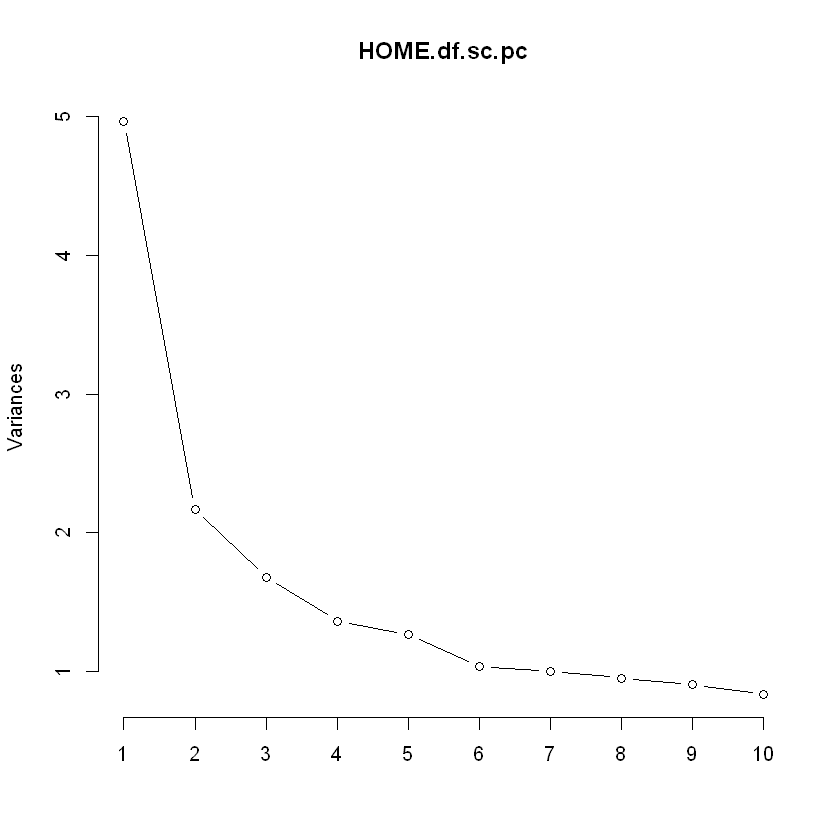

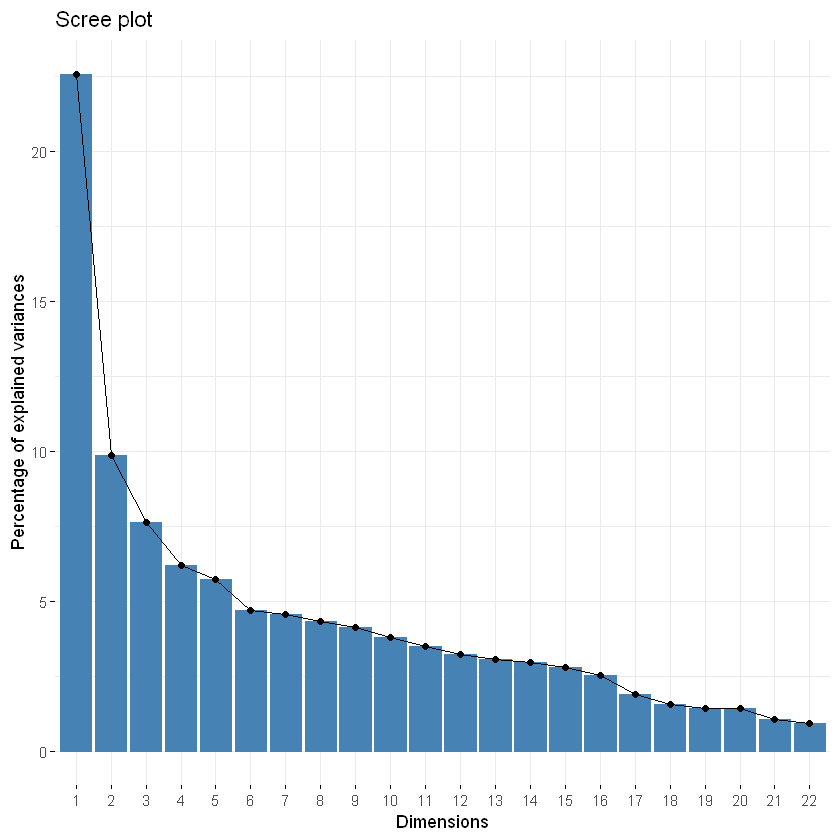

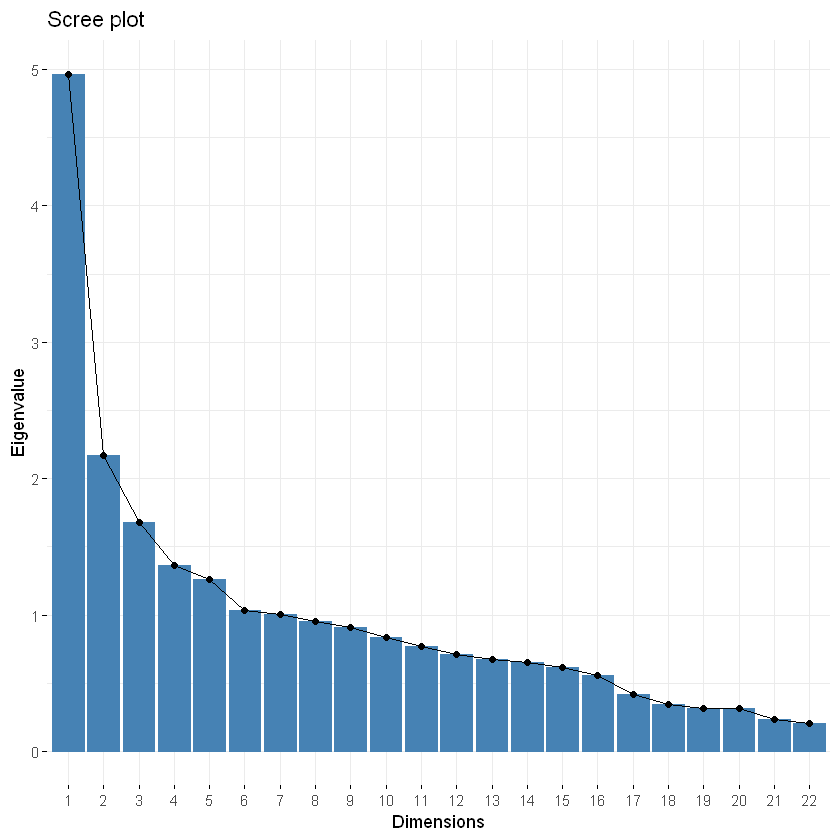

In [13]:
# Use the scree plot to determine how many components to choose for modelling

install.packages("factoextra")
library("factoextra")

plot(HOME.df.sc.pc, type="l")

fviz_screeplot(HOME.df.sc.pc, ncp=22)
fviz_screeplot(HOME.df.sc.pc, ncp=22, choice="eigenvalue")

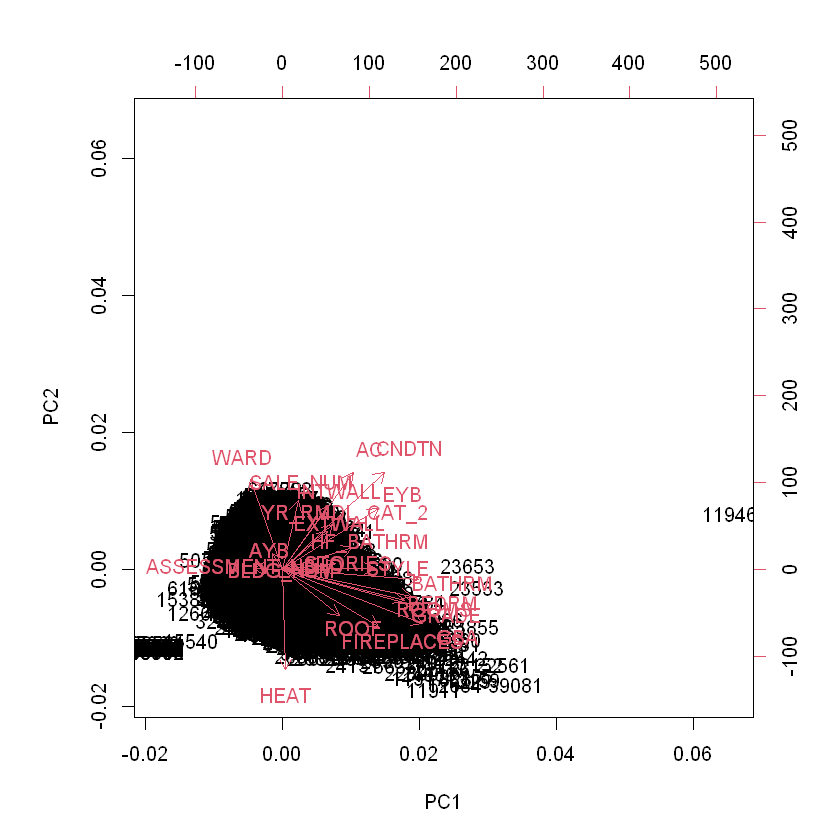

In [14]:
# Let us now explore the first two principal components.

biplot(HOME.df.sc.pc)

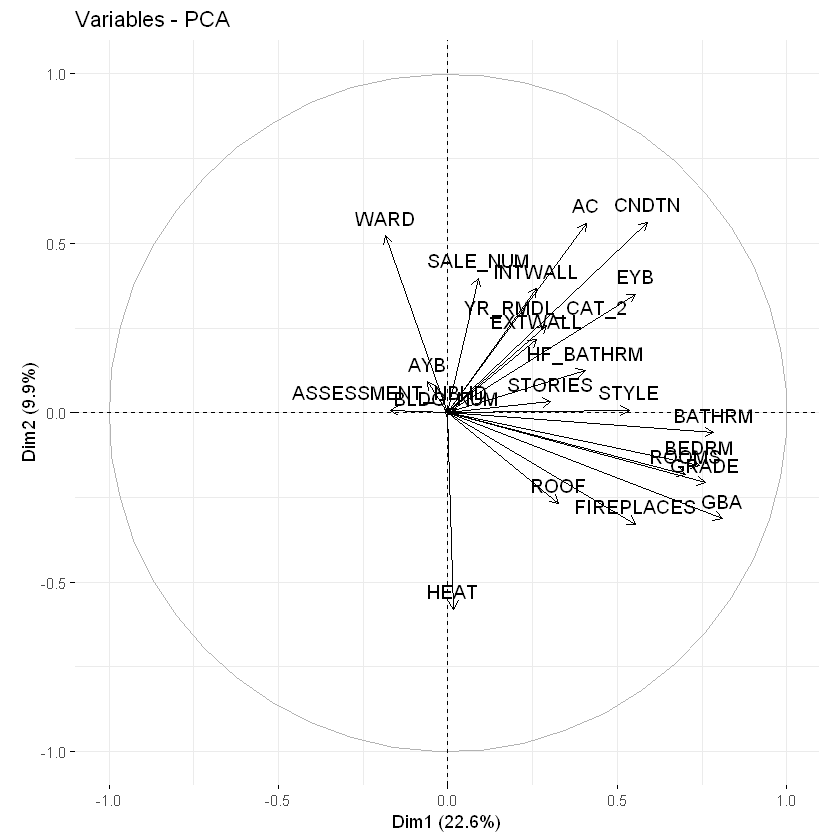

In [15]:
# Obtain the Variables Factor Map Using the Factoextra Package
fviz_pca_var(HOME.df.sc.pc)

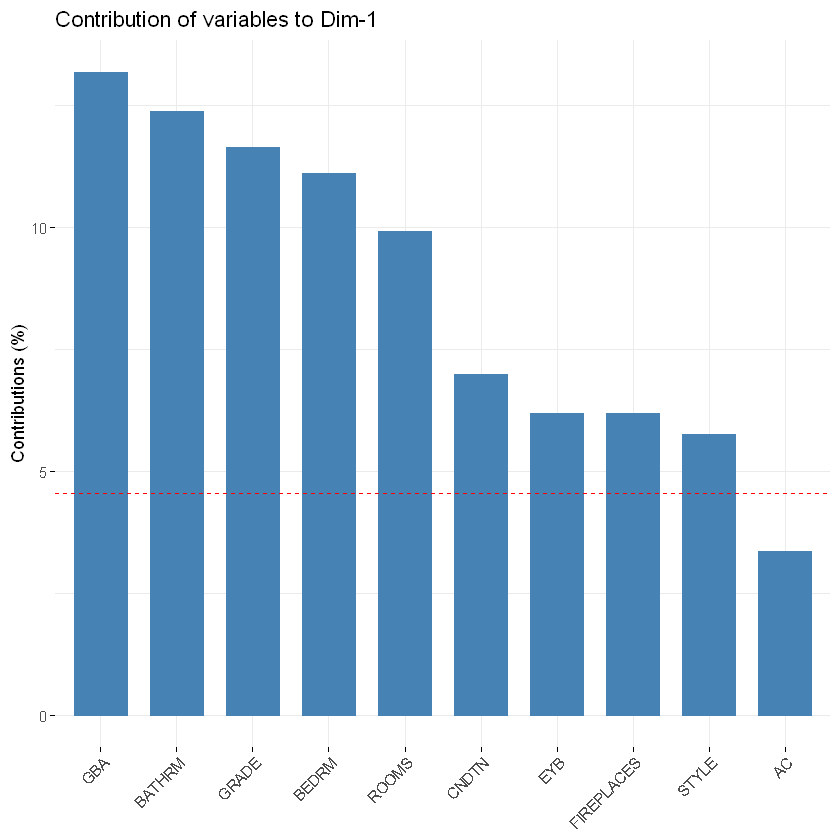

In [16]:
# Contributions of variables to PC1

fviz_contrib(HOME.df.sc.pc, choice = "var", axes = 1, top = 10)

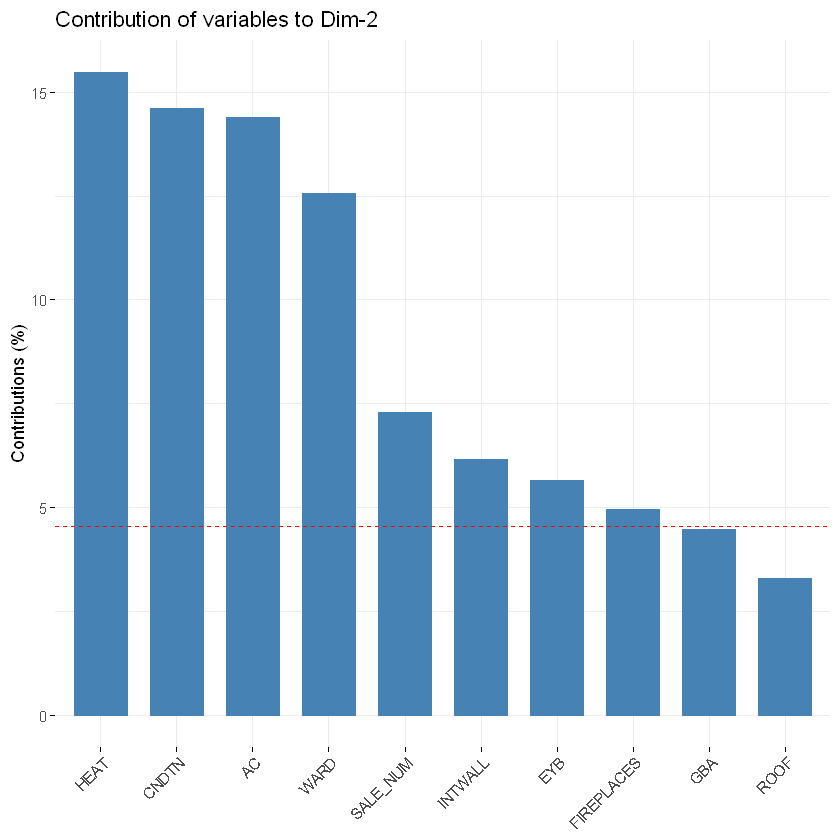

In [17]:
# Contributions of variables to PC2

fviz_contrib(HOME.df.sc.pc, choice = "var", axes = 2, top = 10)